<a href="https://colab.research.google.com/github/snh2144/Steven-Hankins-Python-Class/blob/main/Steven_Hankins_Final_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

President Donald Trump is well known for his controversial and inflammatory rhetoric, which he has used to intimidate his adversaries and attack public officials. Because of the impact that his speech carries within domestic politics and international relations, it's crucial that his discourse is taken seriously, both in public policy and social sciences.

President Trump's primary form of written communication is through Truth Social, a social media platform centered around his own political viewpoints. His posts are amplified through their coverage by major media outlets, which makes his discourse all the more consequential. Understanding the impact of his rhetoric on social media is crucial due to the political power that he possesses in the US and across the world.

#Research Question

What is the distribution of positive, neutral, and negative sentiment across Donald Trump's Truth Social posts, and how does the sentiment of these posts change over the course of 2024?

# Methods

I utilized a dataset from [Kaggle](https://www.kaggle.com/datasets/muhammetakkurt/trump-2024-campaign-truthsocial-truths-tweets) to gather the initial Truth Social post data from President Trump's account, with the posts in the dataset spanning from May 23, 2024, to November 8, 2024.

From there, I utilized a mixture of Rebecca Krisel's [YouTube + VADER Sentiment](https://github.com/rskrisel/youtube_vader/blob/main/youtube_vader_sentiment_analysis.ipynb) and [Google Gemini](https://docs.google.com/document/d/1IAjniY7mmIkE7Nd52qnkNdSOy44w7nxVXcaIKyhydhg/edit?tab=t.0) to build the code necessary to perform the following:
1. Clean the data.
2. Perform VADER Sentiment Analysis, and classify posts as "positive," "neutral," or "negative" based on each post's sentiment score. Note that sentiment scores greater than or equal to 0.05 will be considered positive, scores less than or equal to 0.05 will be considered negative, and anything in between will be neutral.
3. Create daily sentiment data and 7-day sentiment averages.
4. Graph these averages and post classifications onto two graphs showing changes over time.
5. Repeat the same process with a neutral data source to serve as a basis for comparison.

#Hypothesis

H1: President Trump's social media posts will tend to skew towards negative sentiment scores compared to that of the neutral data source. His polarizing rhetoric and extreme stances on social and racial issues, as well as the disparaging remarks he makes against his opponents, would yield sentiment scores that more often than not be negative.

H2: The average sentiment scores of President Trump's Truth Social posts will fluctuate dramatically through 2024. He has created for himself a reputation of unpredictability through his extreme political rhetoric and shifting policy stances, so it would make sense for his social media posts to reflect that same instability through the average sentiment scores going through extreme shifts.

## Load and Clean Data

To start, I loaded the `trump_truths_dataset.csv` file from my Colab files and proceeded with cleaning the dataset through renaming columns, handled missing values, and applied the text cleaning function to create a `text_clean` column. The data is also available [here](https://github.com/snh2144/Steven-Hankins-Python-Class/blob/main/trump_truths_dataset.csv).


In [1]:
import pandas as pd, re
df = pd.read_csv("trump_truths_dataset.csv") # Ensure df is loaded here

print("Columns after loading CSV:", df.columns)

rename_map = {'post_date': 'created_at'}
df = df.rename(columns=rename_map)
df["created_at"] = pd.to_datetime(df["created_at"], utc=True)
df["status_text"] = df["status_text"].fillna("") # Corrected: use 'status_text' instead of 'text'

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text) # Remove special characters and digits
    text = re.sub(r"\s+", " ", text).strip() # Remove extra whitespace
    return text # Corrected: return the cleaned text

df["text_clean"] = df["status_text"].apply(clean_text) # Corrected: apply clean_text to 'status_text'

print("Columns renamed, 'created_at' converted to datetime, missing 'status_text' values handled, and 'text_clean' column created.")
df.head(50)

Columns after loading CSV: Index(['account_name', 'account_handle', 'verified_badge', 'post_date',
       'profile_link', 'avatar_url', 'post_url', 'status_text', 'replies',
       'shares', 'likes', 'video_urls/0', 'image_urls/0', 'video_urls/0/url',
       'video_urls/0/quality', 'video_urls/1/url', 'video_urls/1/quality',
       'video_urls/2/url', 'video_urls/2/quality', 'image_urls/1',
       'image_urls/2', 'image_urls/3', 'video_urls/3/url',
       'video_urls/3/quality', 'video_urls/4/url', 'video_urls/4/quality'],
      dtype='object')
Columns renamed, 'created_at' converted to datetime, missing 'status_text' values handled, and 'text_clean' column created.


,account_name,account_handle,verified_badge,created_at,profile_link,avatar_url,post_url,status_text,replies,shares,...,video_urls/2/url,video_urls/2/quality,image_urls/1,image_urls/2,image_urls/3,video_urls/3/url,video_urls/3/quality,video_urls/4/url,video_urls/4/quality,text_clean
0,Donald J. Trump,realDonaldTrump,True,2024-11-08 10:05:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,"There are fake, untrue, and probably illegal r...",429,"1,41k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,there are fake untrue and probably illegal rum...
1,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"4,29k","9,58k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"1,11k","6,64k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"2,85k","13,3k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:55:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,623,"4,31k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
5,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:38:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"2,64k","9,22k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
6,Donald J. Trump,realDonaldTrump,True,2024-11-05 22:00:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,California - 1 More Hour!Polls are open until ...,"9,06k","5,38k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,california more hourpolls are open until pm lo...
7,Donald J. Trump,realDonaldTrump,True,2024-11-05 20:58:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,Nevada - 1 More Hour!Polls are open until 7:00...,"1,41k","4,18k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nevada more hourpolls are open until pm locali...
8,Donald J. Trump,realDonaldTrump,True,2024-11-05 20:58:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,Montana - 1 More Hour!Polls are open until 8:0...,556,"3,17k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,montana more hourpolls are open until pm local...
9,Donald J. Trump,realDonaldTrump,True,2024-11-05 19:33:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,HI REPUBLICANS! IF YOU’RE IN LINE—STAY IN LINE…,"1,95k","7,72k",...,https://1a-1791.com/video/s8/2/g/N/_/p/gN_pu.h...,1080p,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hi republicans if youre in linestay in line


#VADER Sentiment Analysis

Next, I downloaded the VADER lexicon and initiated the SentimentIntensityAnalyzer, which outputs a sentiment score for each text entry, as shown below.

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Filter out rows where 'text_clean' is empty
df_cleaned = df[df['text_clean'] != ''].copy()

def get_vader_score(text):
    return sia.polarity_scores(text)['compound']

df_cleaned['vader'] = df_cleaned['text_clean'].apply(get_vader_score)

# Update the original df with vader scores for non-empty texts, fill 0 for empty ones
df = df.merge(df_cleaned[['created_at', 'vader']], on='created_at', how='left')
df['vader'] = df['vader'].fillna(0)

def classify_sentiment(score):
    if score >= 0.05:
        return 'pos'
    elif score <= -0.05:
        return 'neg'
    else:
        return 'neu'

df['vader_label'] = df['vader'].apply(classify_sentiment)

print("VADER sentiment analysis completed, 'vader' and 'vader_label' columns created.")
df.head(50)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


VADER sentiment analysis completed, 'vader' and 'vader_label' columns created.


,account_name,account_handle,verified_badge,created_at,profile_link,avatar_url,post_url,status_text,replies,shares,...,image_urls/1,image_urls/2,image_urls/3,video_urls/3/url,video_urls/3/quality,video_urls/4/url,video_urls/4/quality,text_clean,vader,vader_label
0,Donald J. Trump,realDonaldTrump,True,2024-11-08 10:05:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,"There are fake, untrue, and probably illegal r...",429,"1,41k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,there are fake untrue and probably illegal rum...,0.8327,pos
1,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"4,29k","9,58k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0000,neu
2,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"1,11k","6,64k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0000,neu
3,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:56:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"2,85k","13,3k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0000,neu
4,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:55:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,623,"4,31k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0000,neu
5,Donald J. Trump,realDonaldTrump,True,2024-11-07 21:38:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,,"2,64k","9,22k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0000,neu
6,Donald J. Trump,realDonaldTrump,True,2024-11-05 22:00:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,California - 1 More Hour!Polls are open until ...,"9,06k","5,38k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,california more hourpolls are open until pm lo...,0.0000,neu
7,Donald J. Trump,realDonaldTrump,True,2024-11-05 20:58:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,Nevada - 1 More Hour!Polls are open until 7:00...,"1,41k","4,18k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nevada more hourpolls are open until pm locali...,0.0000,neu
8,Donald J. Trump,realDonaldTrump,True,2024-11-05 20:58:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,Nevada - 1 More Hour!Polls are open until 7:00...,"1,41k","4,18k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nevada more hourpolls are open until pm locali...,0.0000,neu
9,Donald J. Trump,realDonaldTrump,True,2024-11-05 20:58:00+00:00,https://truthsocial.com/@realDonaldTrump,https://static-assets-1.truthsocial.com/tmtg:p...,https://truthsocial.com/@realDonaldTrump/posts...,Montana - 1 More Hour!Polls are open until 8:0...,556,"3,17k",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,montana more hourpolls are open until pm local...,0.0000,neu


#Calculating Daily and Weekly Averages

Using the sentiment scores I retrieved from the individual posts, I calculated daily and weekly sentiment score averages, as can be seen below:


In [3]:
df['date'] = df['created_at'].dt.date
daily_sentiment = df.groupby('date')['vader'].mean().reset_index()
daily_sentiment.columns = ['date', 'mean_sentiment']

daily_sentiment['sentiment_variance'] = df.groupby('date')['vader'].var().reset_index(drop=True)

daily_sentiment['rolling_mean_sentiment'] = daily_sentiment['mean_sentiment'].rolling(window=7, min_periods=1).mean()

print("Daily sentiment aggregated, variance and 7-day rolling mean calculated.")
daily_sentiment.head(50)

Daily sentiment aggregated, variance and 7-day rolling mean calculated.


,date,mean_sentiment,sentiment_variance,rolling_mean_sentiment
0,2024-03-06,0.000000,NaN,0.000000
1,2024-05-13,0.000000,NaN,0.000000
2,2024-05-21,0.213800,0.976452,0.071267
3,2024-05-22,0.086867,0.150287,0.075167
4,2024-05-23,0.151447,0.170242,0.090423
5,2024-05-24,-0.103197,0.307536,0.058153
6,2024-05-25,0.014737,0.317471,0.051951
7,2024-05-26,0.563830,0.274301,0.132498
8,2024-05-27,0.292947,0.580283,0.174347
9,2024-05-28,-0.234443,0.273500,0.110313


#Line Plot

Finally, I produced a visual output of the data through producing a line plot that maps the daily and weekly averages of VADER sentiment analysis, and making other additions such as including a neutral line, legend, and grid, as well as saving the graph as `fig_sentiment_vader.png`.



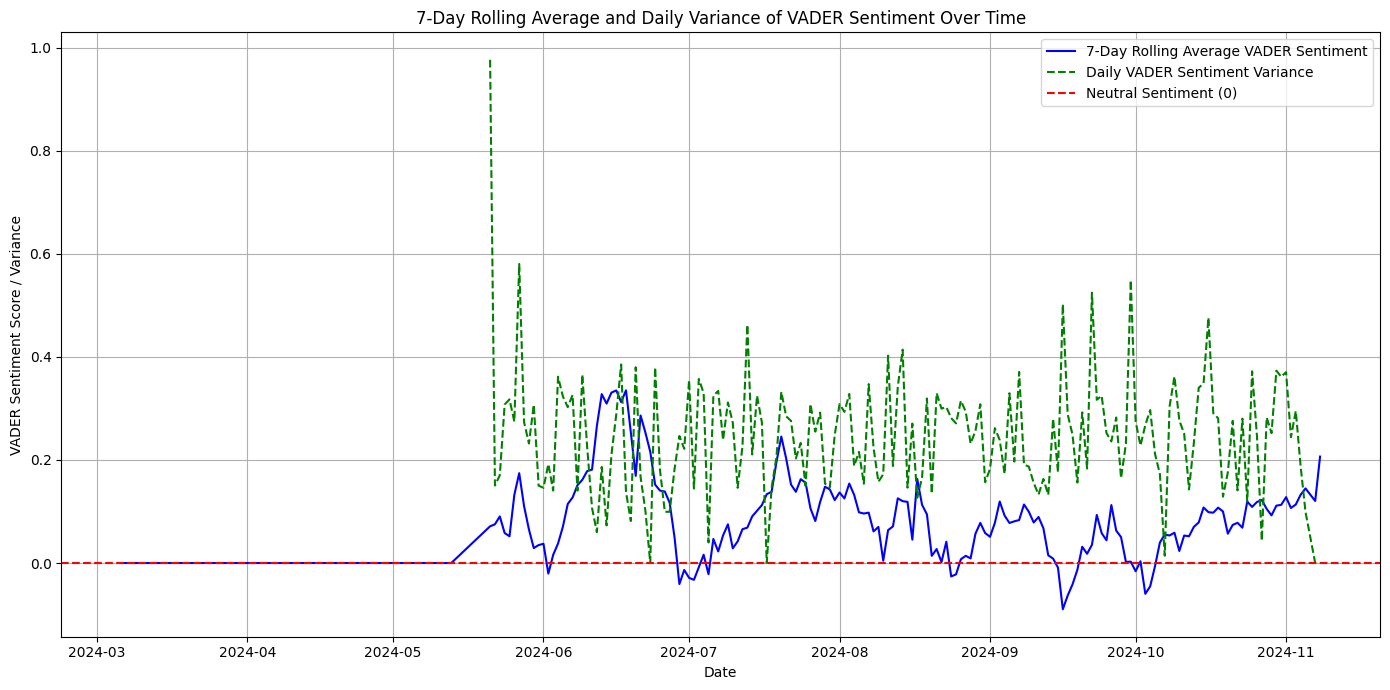

Line plot of 7-day rolling average and daily variance of VADER sentiment saved as 'fig_sentiment_vader.png'.


In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment['date'], daily_sentiment['rolling_mean_sentiment'], label='7-Day Rolling Average VADER Sentiment', color='blue')
plt.plot(daily_sentiment['date'], daily_sentiment['sentiment_variance'], label='Daily VADER Sentiment Variance', color='green', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--', label='Neutral Sentiment (0)')

plt.xlabel('Date')
plt.ylabel('VADER Sentiment Score / Variance')
plt.title('7-Day Rolling Average and Daily Variance of VADER Sentiment Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fig_sentiment_vader.png')
plt.show()

print("Line plot of 7-day rolling average and daily variance of VADER sentiment saved as 'fig_sentiment_vader.png'.")

#Daily Post Sentiment Totals

I also produced a graph showing the distribution of President Trump's posts that have positive, neutral, and negative sentiment scores, with the total number of posts per day shown in the graph as well.

<Figure size 1400x700 with 0 Axes>

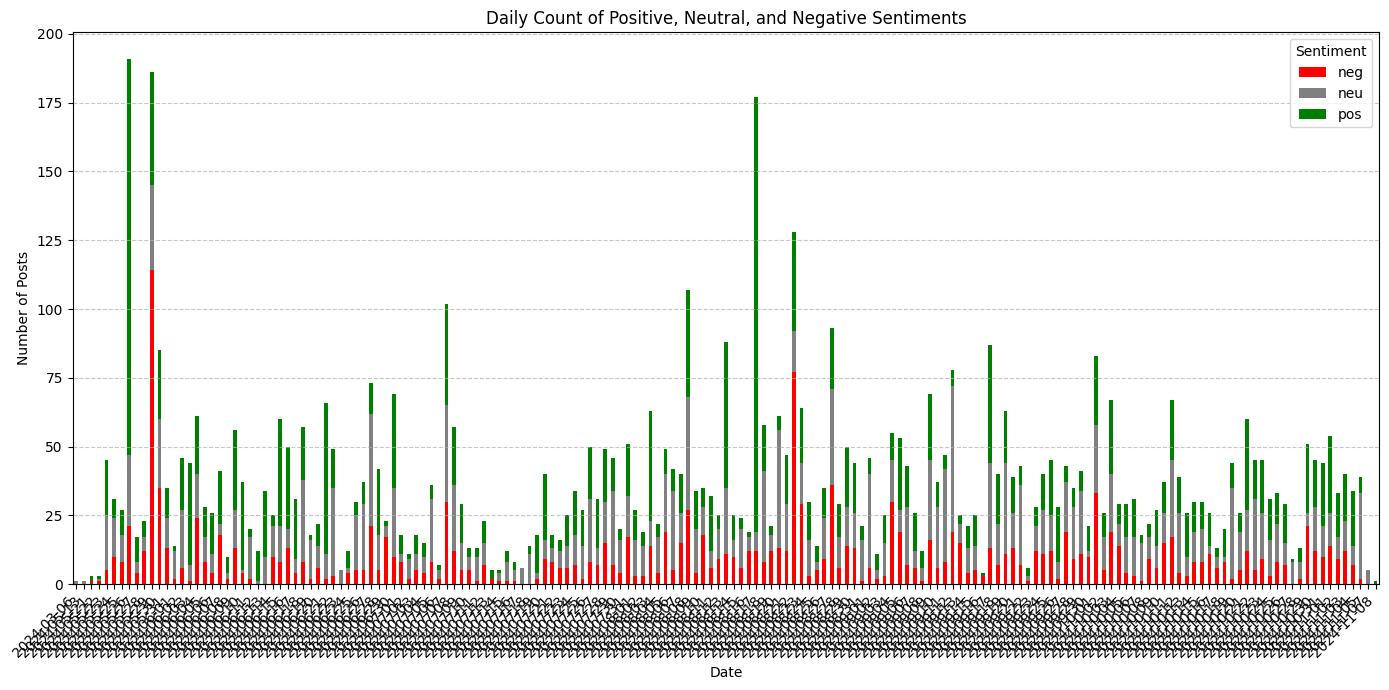

Stacked bar chart showing daily counts of positive, neutral, and negative sentiments generated.


In [5]:
sentiment_counts_daily = df.groupby(['date', 'vader_label']).size().unstack(fill_value=0)
sentiment_counts_daily = sentiment_counts_daily.reindex(columns=['neg', 'neu', 'pos'], fill_value=0)

plt.figure(figsize=(14, 7))
sentiment_counts_daily.plot(kind='bar', stacked=True, figsize=(14, 7), color={'pos': 'green', 'neu': 'gray', 'neg': 'red'})
plt.title('Daily Count of Positive, Neutral, and Negative Sentiments')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Stacked bar chart showing daily counts of positive, neutral, and negative sentiments generated.")

# Comparison to Neutral Data Source
I use code output again from [Google Gemini](https://docs.google.com/document/d/1IAjniY7mmIkE7Nd52qnkNdSOy44w7nxVXcaIKyhydhg/edit?tab=t.0) to web scrape data from a neutral data source as a basis for comparison to President Trump's Truth Social posts, using a similar process as was initiated for his posts to establish the neutral findings listed below.

#Web Scraping

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Initialize an empty list to store the scraped quotes and their authors
quotes_data = []

# Define the base URL for the website to scrape
base_url = 'http://quotes.toscrape.com'

# Loop through the first 10 pages of the website
for i in range(1, 11):
    url = f"{base_url}/page/{i}/"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all div elements with the class 'quote' on the page
    quotes = soup.find_all('div', class_='quote')

    for quote_div in quotes:
        text = quote_div.find('span', class_='text').get_text(strip=True)
        author = quote_div.find('small', class_='author').get_text(strip=True)
        quotes_data.append({'quote': text, 'author': author})

# Convert the quotes_data list into a pandas DataFrame
df_quotes = pd.DataFrame(quotes_data)

print("Quotes successfully scraped and stored in df_quotes.")
df_quotes.head()

Quotes successfully scraped and stored in df_quotes.


,quote,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


#Data Cleaning

In [7]:
df_quotes['quote_clean'] = df_quotes['quote'].apply(clean_text)

print("Quotes cleaned and stored in 'quote_clean' column.")
df_quotes.head()

Quotes cleaned and stored in 'quote_clean' column.


,quote,author,quote_clean
0,“The world as we have created it is a process ...,Albert Einstein,the world as we have created it is a process o...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,it is our choices harry that show what we trul...
2,“There are only two ways to live your life. On...,Albert Einstein,there are only two ways to live your life one ...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,the person be it gentleman or lady who has not...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,imperfection is beauty madness is genius and i...


In [8]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

df_quotes['quote_clean'] = df_quotes['quote'].apply(clean_text)

print("Quotes cleaned and stored in 'quote_clean' column.")
df_quotes.head()

Quotes cleaned and stored in 'quote_clean' column.


,quote,author,quote_clean
0,“The world as we have created it is a process ...,Albert Einstein,the world as we have created it is a process o...
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,it is our choices harry that show what we trul...
2,“There are only two ways to live your life. On...,Albert Einstein,there are only two ways to live your life one ...
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,the person be it gentleman or lady who has not...
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,imperfection is beauty madness is genius and i...


#VADER Sentiment Generation

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_vader_score(text):
    return sia.polarity_scores(text)['compound']

def classify_sentiment(score):
    if score >= 0.05:
        return 'pos'
    elif score <= -0.05:
        return 'neg'
    else:
        return 'neu'

# Apply the get_vader_score function to the 'quote_clean' column
df_quotes['vader'] = df_quotes['quote_clean'].apply(get_vader_score)

# Apply the classify_sentiment function to the new 'vader' column
df_quotes['vader_label'] = df_quotes['vader'].apply(classify_sentiment)

print("VADER sentiment analysis performed and 'vader' and 'vader_label' columns added to df_quotes.")
df_quotes.head()

VADER sentiment analysis performed and 'vader' and 'vader_label' columns added to df_quotes.


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,quote,author,quote_clean,vader,vader_label
0,“The world as we have created it is a process ...,Albert Einstein,the world as we have created it is a process o...,0.2500,pos
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,it is our choices harry that show what we trul...,0.6326,pos
2,“There are only two ways to live your life. On...,Albert Einstein,there are only two ways to live your life one ...,-0.7306,neg
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,the person be it gentleman or lady who has not...,-0.7582,neg
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,imperfection is beauty madness is genius and i...,-0.1496,neg


#Plotting the Neutral Findings

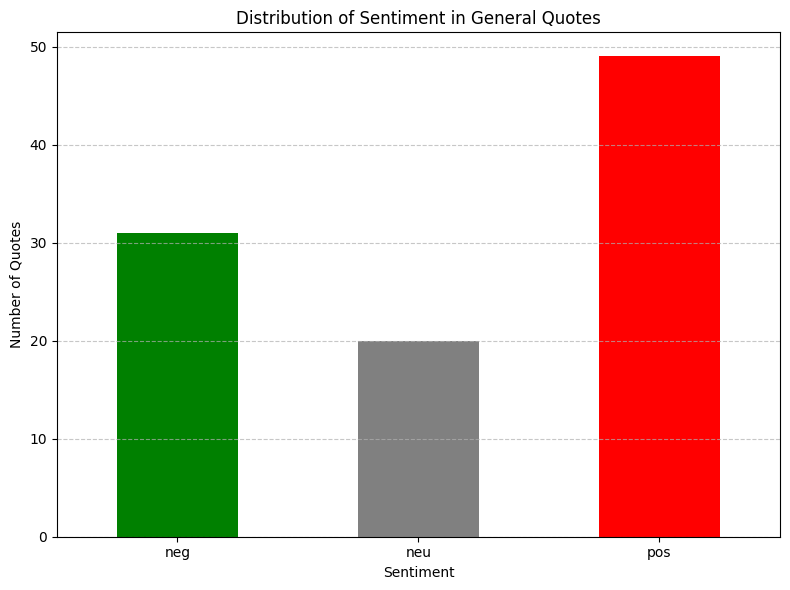

Bar chart showing the distribution of sentiment in general quotes generated.


In [10]:
import matplotlib.pyplot as plt

sentiment_distribution = df_quotes.groupby('vader_label').size()

plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Distribution of Sentiment in General Quotes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Quotes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Bar chart showing the distribution of sentiment in general quotes generated.")

#Analysis

In analyzing the two graphs from Trump's Truth Social posts, different findings can be produced when comparing the two together.
1. The quantity of daily posts is staggering, with some days almost reaching 200 posts per day. This allows for a lot of room for a turbulent messaging strategy, with President Trump likely producing immediate reactions of positive and negative news coverage.
2. Rolling average values are more stable, although daily averages tend to be more turbulent. The averages for these sentiment values tend to range from neutral to low-positive.
3. Many days present a mixture of positive and negative sentiment values, with there being a generally larger number of posts with positive sentiment scores. This could be attributed to President Trump likely trying to energize his voter base for election day.

#Limitations

While this analysis captures how the sentiment scores change across President Trump's Truth Social posts, it doesn't produce any kind of analysis for the images and articles that he posts or reposts on his account. Visual and external data could produce large changes to the scores produced from this analysis.

Also, previewing some of the data before creating the two graphs, I noticed that some posts that were given sentiment values of 0 weren't exactly emotionally neutral. Refining how emotional sentiment is defined and scored could yield different results as well.

# Conclusion

To conclude, the results of this Python analysis produce different findings from what I predicted in my original hypotheses, producing daily and weekly average sentiment values for President Trump's social media that were (a.) more stable than expected, and (b.) ranged from (on average) neutral to slightly positive. President Trump's sentiment category ranges were also more similar to those pulled from the neutral data source than was previously expected.

While VADER sentiment analysis is useful in gathering information on the general daily turbulence of President Trump's messaging,  more detailed analysis is needed through organizing visual sentiment data, as well as the sentiment variance in any articles that President Trump shares to his audience.

Through understanding the variance in President Trump's messaging, political and public policy analysts can inform the public about the extent to which emotion-based rhetoric is used to sway key supporters, and recognizing the turbulent rhetoric that elected officials use can also help government institutions and independent organizations to launch their own social media campaigns to combat disinformation.

As for next steps, it would definitely be helpful to expand sentiment analysis across his political career from 2015-2025 to see if sentiment variance can be attributed to key events, as well as if there are any larger trends as to how his sentiment changes over time. Also, performing a similar sentiment analysis to the images, videos, and news articles that he shares and reposts on Truth Social could yield valuable information as well.